# 영화 추천

## 데이터 전처리

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup

In [4]:
df = pd.read_csv('movie_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24255 entries, 0 to 24254
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   영화id    24255 non-null  int64  
 1   제목      24255 non-null  object 
 2   장르      24255 non-null  object 
 3   평점      24255 non-null  float64
 4   줄거리     24234 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 947.6+ KB


In [5]:
df.drop(df.loc[df['평점']==0.00].index, inplace=True)
len(df.loc[df['평점']==0.00].index)

0

In [6]:
df.drop(df.loc[df['평점']==10.0].index, inplace=True)
len(df.loc[df['평점']==10.0].index)

0

In [7]:
df = df.reset_index()
df = df.drop(columns=['index'])
df[30:40]

,영화id,제목,장르,평점,줄거리
30,209496,고장난 론,애니메이션,9.32,비봇을 갖는 것이 유일한 소원인 소심한 소년 ‘바니’에게도드디어 ‘론’이라는 비봇이...
31,191637,고질라 VS. 콩,액션,8.18,"거대 몬스터들의 습격을 받은 지 3년 후, 콩은 스컬 아일랜드를 떠나 인간들의 보호..."
32,197491,골든맨,범죄,6.57,지긋지긋한 생활에서 벗어나 한탕만을 노리는 우체국 운전사 ‘메로니’가난의 늪에 허덕...
33,206177,공작조: 현애지상,범죄,5.91,"냉전이 감도는 1931년 중국, 소련에서 훈련을 받고 돌아온 4명의 특수요원은작전명..."
34,191267,관계의 가나다에 있는 우리는,드라마,8.25,언제나 잔고 제로인 미생 ‘민규’.어린 시절 캐나다로 피겨 유학을 떠났다가 은퇴를 ...
35,205629,괴기맨숀,공포,6.06,공포 웹툰 작가 지우는 아이디어를 찾아 괴기맨숀이라 불리는 허름한 아파트에 도착한다...
36,191887,구독좋아요알림설정,코미디,7.25,‘커트의 세상’을 운영하는 10년차 듣보 크리에이터 ‘커트’(조 키어리)는100만 ...
37,200183,"구라, 베토벤",한국,8.39,어렸을 때 부터 욱해도 소심해서 표현도 못하던 서정우 감독 캐릭터.욱해도 표현도 못...
38,190012,구원,스릴러,6.97,"깊은 어둠이 드리워진 그곳… 심장도 얼어붙을 만큼 추운 겨울, 밀양호에서 진숙의 시..."
39,202086,굴뚝마을의 푸펠,애니메이션,8.92,새까만 연기로 뒤덮인 굴뚝마을에서는1. 하늘을 올려다보지 말 것2. 꿈을 믿지 말 ...


In [8]:
# df['줄거리'].nunique(), df['평점'].nunique()

In [9]:
# df.drop_duplicates(subset=['제목'], inplace=True)

In [10]:
# len(df)

In [11]:
df.loc[df.제목.isnull()]

,영화id,제목,장르,평점,줄거리


In [12]:
df = df.dropna(how='any')

In [13]:
df['줄거리'] = df['줄거리'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df = df.reset_index()

<ipython-input-13-4255e0998170>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['줄거리'] = df['줄거리'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [14]:
df = df.drop(columns=['index'])
len(df['영화id'])

18739

In [15]:
len(df['영화id'])

18739

## 영화 평점 10점과 0점을 제외해야 하는 이유

In [16]:
df2 = pd.read_csv('movie_data.csv')

In [17]:
df2['평점'] = df2['평점'].astype(int)

In [18]:
from matplotlib import font_manager, rc

In [19]:
font_test = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_test).get_name()
rc('font', family=font_name)

C:\Users\qwe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='평점', ylabel='count'>

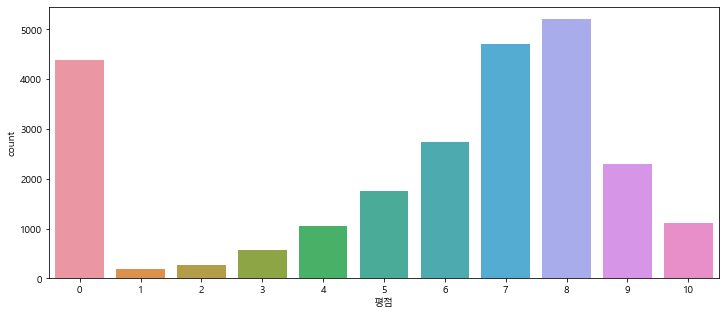

In [20]:
# 평점 0이 많은걸 확인할 수 있다.

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(df2['평점'])

# 영화추천 머신러닝

In [21]:
x_train = df['장르']
y_train = df['평점']

In [22]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x_train)
print(vectorizer.get_feature_names())
# vectorizer.vocabulary_

['2008', '2013', '2014', '2015', 'sf', 'tv영화', '가족', '공연실황', '공포', '공화국', '그리스', '남아프리카', '노르웨이', '느와르', '다큐멘터리', '대만', '덴마크', '독일', '드라마', '러시아', '로맨스', '멕시코', '멜로', '모험', '몽골', '무협', '뮤지컬', '미국', '미스터리', '범죄', '벨기에', '부탄', '블랙코미디', '서독', '서부', '서사', '서스펜스', '소련', '스릴러', '스페인', '실험', '아르헨티나', '아일랜드', '애니메이션', '액션', '에로', '연방', '영국', '오스트레일리아', '오스트리아', '우즈베키스탄', '웹무비', '이란', '이탈리아', '인도', '일본', '전쟁', '중국', '체코', '캐나다', '컬트', '코미디', '쿠바', '태국', '판타지', '프랑스', '핀란드', '한국', '헝가리', '홍콩']


In [24]:
similarity = cosine_similarity(x, x)
similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [25]:
similarity = similarity.argsort()
similarity

array([[ 9369, 11991, 11992, ..., 16561, 16527,     0],
       [    0, 12353, 12354, ..., 12804, 11079,  5539],
       [    0, 11493, 11495, ...,  3199, 10040,  9369],
       ...,
       [    0, 12353, 12354, ..., 12804, 11079,  5539],
       [    0, 11493, 11495, ...,  3199, 10040,  9369],
       [    0, 12476, 12475, ...,   191, 16123, 18738]], dtype=int64)

In [26]:
similarity = similarity[:, ::-1]
similarity

array([[    0, 16527, 16561, ..., 11992, 11991,  9369],
       [ 5539, 11079, 12804, ..., 12354, 12353,     0],
       [ 9369, 10040,  3199, ..., 11495, 11493,     0],
       ...,
       [ 5539, 11079, 12804, ..., 12354, 12353,     0],
       [ 9369, 10040,  3199, ..., 11495, 11493,     0],
       [18738, 16123,   191, ..., 12475, 12476,     0]], dtype=int64)

In [27]:
similarity.shape

(18739, 18739)

In [28]:
def get_recommend_movie(title):
    search_genre = df[df['제목'] == title]
    search_genre_index = search_genre.index.values
    print(search_genre_index)
    similarity_index = similarity[search_genre_index, :30].reshape(-1)
    print(similarity_index)
    similarity_index = similarity_index[similarity_index != search_genre_index]
    print(similarity_index)
    result = df.iloc[similarity_index].sort_values('평점', ascending=False)[:5]
    return result

- 제목이 중복이 될 경우 오류가 나는 상황 발생

In [29]:
import random

In [30]:
shuffle = list(df['제목'].values)
movie = random.choice(shuffle)
print(movie)

소림축구


In [31]:
genre_df = get_recommend_movie(movie)
genre_df

[13283]
[13338  3715 12244 16897  7295  1754 12241 16891 12239  5754 10422 16886
 16885 16879 14710 14714 10438 12246  3684  1742 16931 16940 12272 12271
 12270  1719  1720 12267  5741  3704]
[13338  3715 12244 16897  7295  1754 12241 16891 12239  5754 10422 16886
 16885 16879 14710 14714 10438 12246  3684  1742 16931 16940 12272 12271
 12270  1719  1720 12267  5741  3704]


,영화id,제목,장르,평점,줄거리
16931,36392,못말리는 번디 가족,코미디,9.64,년부터 년까지 년간 편의 에피소드가 제작된 인기 시리즈
12239,34194,쾌걸 춘향,코미디,9.23,남원의 대표얼짱 성춘향 불량전학생 이몽룡을 만나다 알바를 위해 광한루 월담을 하던 ...
16891,11510,마타도르,코미디,9.00,은퇴한 투우사인 디에고 몽테스는 투우사 양성소를 개설하여 제자들을 가르친다 제자 엔...
1719,167053,업사이드,코미디,8.67,떳떳한 가장이 되기 위해 직장이 필요한 델케빈 하트은시간 케어가 필요한 뉴욕의 주식...
12241,39576,쿵푸 허슬,코미디,8.67,법보다 도끼가 앞서던 년대 중국 상하이 난세를 틈타 어둠의 세력을 평정한 도끼파의 ...


# 영화 리뷰 감정분석

## 데이터 로드

- 출처 : https://raw.githubusercontent.com/e9t/nsmc/master

In [30]:
import urllib.request

In [31]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")

('ratings_train.txt', <http.client.HTTPMessage at 0x23eda067b50>)

In [32]:
df = pd.read_table('ratings_train.txt')
df.to_csv('emotion_analysis.csv', index=False,encoding='utf-8-sig')
df = pd.read_csv('emotion_analysis.csv')
df = df.rename(columns={'document':'review', 'label':'positive'})
df

,id,review,positive
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


## 데이터 전처리

* 중복값 제거

In [33]:
df['review'].nunique(), df['positive'].nunique()
df.drop_duplicates(subset=['review'], inplace=True)
len(df)

146183

* Nan값 제거

In [34]:
df.loc[df.review.isnull()]
df = df.dropna(how='any')
df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df = df.reset_index()
df2 = df.copy()
df2['review']

<ipython-input-34-25cd9cc984da>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-34-25cd9cc984da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


0                                         아 더빙 진짜 짜증나네요 목소리
1                                흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                                 교도소 이야기구먼 솔직히 재미는 없다평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
                                ...                        
146177                                      인간이 문제지 소는 뭔죄인가
146178                                           평점이 너무 낮아서
146179                        이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다
146180                           청춘 영화의 최고봉방황과 우울했던 날들의 자화상
146181                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: review, Length: 146182, dtype: object

* 문장을 단어로 쪼개어 전처리

- Kkma이 아닌 Okt를 쓴 이유

In [35]:
# from konlpy.tag import Kkma

# Kkma = Kkma()
# temp_word = []
# stop_words = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와',
#               '한','하다', '적', '인', '으로도', '끼리', '을', '까지', '에게도', '이니', '만으로', '이다']

# for sentence in df['review'][:5]:
#     temp = Kkma.nouns(sentence)
#     temp = [word for word in temp if not word in stop_words]
#     temp_word.append(temp)
    
# temp_word

In [36]:
from konlpy.tag import Okt

okt = Okt()
temp_word = []
stop_words = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와',
              '한','하다', '적', '인', '으로도', '끼리', '을', '까지', '에게도', '이니', '만으로', '이다']

for sentence in df['review']:
    temp = okt.morphs(sentence)
    temp = [word for word in temp if not word in stop_words]
    temp_word.append(temp)
    
temp_word[:5]

[['아', '더빙', '진짜', '짜증나네요', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍지', '않구나'],
 ['너', '무재', '밓었', '다그', '래서', '보는것을', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직히', '재미', '없다', '평점', '조정'],
 ['사이',
  '몬페',
  '그',
  '익살스런',
  '연기',
  '돋보였던',
  '영화',
  '스파이더맨',
  '에서',
  '늙어',
  '보이기만',
  '했던',
  '커스틴',
  '던스트',
  '너무나도',
  '이뻐',
  '보였다']]

## 정수 인코딩

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(temp_word)

* 빈도 수가 적은 단어들 삭제하기

In [38]:
threshold = 2
total_count = len(tokenizer.word_index)
print(total_count)
low_count = 0

for key, value in tokenizer.word_counts.items():
    if value < threshold:
        low_count += 1
        
vocab_size = total_count-low_count+1
print(vocab_size)

tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(temp_word)
temp_word = tokenizer.texts_to_sequences(temp_word)
print(temp_word[:3])

temp_positive = np.array(df['positive'])
print(temp_positive)

99994
45373
[[36, 412, 6, 6588, 619], [899, 414, 27, 562, 1, 177, 1512, 10, 933, 6026, 25774], [352, 2803, 2636, 7316, 12018, 184, 3]]
[0 1 0 ... 0 1 0]


* 빈 단어 제거

In [39]:
drop_word = [idx for idx, sentence in enumerate(temp_word) if len(sentence) < 1]
print(len(drop_word))

temp_word = np.delete(temp_word, drop_word, axis=0)
temp_positive = np.delete(temp_positive, drop_word, axis=0)
print(len(temp_word))
print(type(temp_word))
print(temp_positive)

1091
145091
<class 'numpy.ndarray'>
[0 1 0 ... 0 1 0]


C:\Users\qwe\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


* 서로 다른 길이의 리뷰를 같은 길이로 바꿔주는 작업

68
10.545726475108724


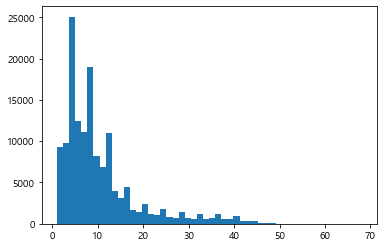

In [40]:
plt.hist([len(s) for s in temp_word], bins=50)
print(max(len(i) for i in temp_word))
print(sum(map(len, temp_word))/len(temp_word))

In [41]:
def per_sentence(max_len: int, word: list):
    count = 0
    for s in word:
        if len(s) < max_len:
            count += 1
    print((count/len(word))*100)
    
max_len = 28
per_sentence(max_len, temp_word)

93.22425236575667


In [42]:
temp_word = pad_sequences(temp_word, maxlen=max_len)
print(temp_word)

[[    0     0     0 ...     6  6588   619]
 [    0     0     0 ...   933  6026 25774]
 [    0     0     0 ... 12018   184     3]
 ...
 [    0     0     0 ... 15111 15000 16873]
 [    0     0     0 ... 26536   493 10751]
 [    0     0     0 ...    44  2878     1]]


## 감정분석 머신러닝

* 데이터 학습

In [43]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [44]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_len, mask_zero=True))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [45]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [46]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(temp_word, temp_positive, epochs=60, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/60
1935/1935 [==============================] - 74s 36ms/step - loss: 0.3920 - acc: 0.8216 - val_loss: 0.3582 - val_acc: 0.8418

Epoch 00001: val_acc improved from -inf to 0.84183, saving model to model.h5
Epoch 2/60
1935/1935 [==============================] - 70s 36ms/step - loss: 0.3195 - acc: 0.8627 - val_loss: 0.3341 - val_acc: 0.8565

Epoch 00002: val_acc improved from 0.84183 to 0.85647, saving model to model.h5
Epoch 3/60
1935/1935 [==============================] - 72s 37ms/step - loss: 0.2826 - acc: 0.8836 - val_loss: 0.3269 - val_acc: 0.8586

Epoch 00003: val_acc improved from 0.85647 to 0.85858, saving model to model.h5
Epoch 4/60
1935/1935 [==============================] - 71s 37ms/step - loss: 0.2586 - acc: 0.8954 - val_loss: 0.3345 - val_acc: 0.8575

Epoch 00004: val_acc did not improve from 0.85858
Epoch 5/60
1935/1935 [==============================] - 73s 38ms/step - loss: 0.2401 - acc: 0.9041 - val_loss: 0.3337 - val_acc: 0.8613

Epoch 00005: val_acc improve

* 학습된 모델 로드

In [47]:
loaded_model = load_model('model.h5')
print(loaded_model.evaluate(temp_word, temp_positive))

4535/4535 [==============================] - 26s 6ms/step - loss: 0.2409 - acc: 0.9035
[0.24089278280735016, 0.9035088419914246]


* 모델 테스트

In [ ]:
def sentiment_predict(new_sentence):
    
    new_sentence = okt.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stop_words] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        return str(round(score * 100, 2))+' 긍정'
    else:
        return str(round((1 - score) * 100, 2)) + ' 부정'

In [ ]:
sentiment_predict('아이건아니다')

In [48]:
codes = [genre for genre in genre_df['영화id']]
codes

[143507, 84018, 19303, 172009, 187507]

In [49]:
# 추천 영화들의 리뷰와 평점을 한번에 볼 수 있다.
def get_review(code):
        for num,i in enumerate(code):
            reviews=[]
            grades=[]
            for p in range(1,10):
                url='https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code={}&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}'.format(i, p)            
                res = requests.get(url)
                soup = BeautifulSoup(res.text, 'lxml')
                review_lists=soup.find_all('li')[6:]

                for idx,j in enumerate(review_lists):
                    review=j.find('span', id="_filtered_ment_{}".format(idx)).get_text().strip()
                    grade=int(j.find('div',class_="star_score").get_text())
                    if '' != review and review not in reviews:
                        reviews.append(review)
                        grades.append(grade)

            globals()['review_list{}'.format(num+1)]=reviews
            globals()['grade_list{}'.format(num+1)]=grades
        reviews_lists=[review_list1,review_list2,review_list3,review_list4,review_list5]
        grades_lists=[grade_list1,grade_list2,grade_list3,grade_list4,grade_list5]
        return reviews_lists, grades_lists

- index에 맞춰 영화 네티즌의 리뷰와 평점을 끌어옴

- 그 다음 시각화할 예정

In [50]:
def get_review(code):
    reviews=[]
    grades=[]
    for p in range(1,10):
        url='https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code={}&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}'.format(code ,p)            
        res = requests.get(url)
        soup = BeautifulSoup(res.text, 'lxml')
        review_lists=soup.find_all('li')[6:]

        for idx, j in enumerate(review_lists):
            review=j.find('span', id="_filtered_ment_{}".format(idx)).get_text().strip()
            grade=int(j.find('div',class_="star_score").get_text())
            if '' != review and review not in reviews:
                reviews.append(review)
                grades.append(grade)
    zip_grades_reviews = list(zip(reviews, grades))
    return zip_grades_reviews

In [51]:
get_review(104481)

[('시즌 2가 흡인력이 제일 강했습니다', 10),
 ('마세코 시즌1부터 연속으로 2까지 봤습니다. 감동적인면도 있고 노력하는 사람들의 모습이 너무 멋있었습니다. 백성진씨랑 오보아씨가 가장 기억에 남는군요. 오보아씨처럼 저도 한쪽 청력이 안좋습니다. 저도 오보아씨처럼 장...',
  10),
 ('세계적 셰프심사위원들의 초심조차 되돌아보게 만든 우승자 최강록씨의 순수한 마음가짐 열정과 노력이 있었기에 가능했던, 요리와 감동 그리고 인간미와 열정을 모두 느낄수 있는 있었던 요리프로의 수작이었다. 서바이벌임에도 ...',
  9)]

In [52]:
def sentiment_predict(new_sentence):
    
    new_sentence = okt.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stop_words] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        return str(round(score * 100, 2))+' 긍정'
    else:
        return str(round((1 - score) * 100, 2)) + ' 부정'

In [53]:
positive = []
negative = []
ranks = []

def get_emotion(code):
    movie = get_review(code)
    for review, rank in movie:
        emotion = sentiment_predict(review)
        if '긍정' in emotion:
            emotion = emotion.replace('긍정', '')
            positive.append(emotion)
            ranks.append(rank)

        else:
            emotion = emotion.replace('부정', '')
            negative.append(emotion)
            ranks.append(rank)
            
    return positive, negative, ranks

In [54]:
get_emotion(71081)

(['99.27 ',
  '97.83 ',
  '99.58 ',
  '77.73 ',
  '96.02 ',
  '71.49 ',
  '99.66 ',
  '99.22 ',
  '99.59 ',
  '99.0 ',
  '98.07 ',
  '98.08 ',
  '93.59 ',
  '99.47 ',
  '99.12 ',
  '99.26 ',
  '95.25 ',
  '61.67 ',
  '99.91 ',
  '99.38 ',
  '93.85 ',
  '96.49 ',
  '99.9 ',
  '95.82 ',
  '97.9 ',
  '99.94 ',
  '99.53 ',
  '99.94 ',
  '99.75 ',
  '61.77 ',
  '90.3 ',
  '99.55 ',
  '98.55 ',
  '99.15 ',
  '97.41 ',
  '96.71 ',
  '99.45 ',
  '99.31 ',
  '92.26 ',
  '99.7 ',
  '96.89 ',
  '98.27 ',
  '94.84 ',
  '97.16 ',
  '99.03 ',
  '99.59 ',
  '97.52 ',
  '95.92 ',
  '99.34 ',
  '99.52 ',
  '83.21 ',
  '58.62 ',
  '80.98 ',
  '97.08 ',
  '88.0 ',
  '99.77 ',
  '77.91 ',
  '93.25 ',
  '99.85 ',
  '99.32 ',
  '99.68 ',
  '91.48 ',
  '99.7 ',
  '99.07 ',
  '99.29 ',
  '99.6 ',
  '92.62 ',
  '55.13 ',
  '97.27 ',
  '95.25 ',
  '97.92 ',
  '98.87 ',
  '98.76 ',
  '99.01 ',
  '97.39 ',
  '99.58 ',
  '99.61 '],
 ['89.73 ',
  '99.46 ',
  '56.86 ',
  '53.62 ',
  '98.31 ',
  '68.87 ',
  '92.01 ',

In [55]:
x = ['긍정', '부정']
y = [len(positive), len(negative)]
y

[77, 13]

In [56]:
emotion_review = positive+negative

data = pd.DataFrame({'댓글':emotion_review, '평점':ranks})
rate = data['평점'].value_counts()
rate

10    78
8      6
9      5
6      1
Name: 평점, dtype: int64

In [57]:
# import matplotlib.pyplot as plt
# from matplotlib.figure import Figure


# figure: Figure = plt.figure(figsize=(9, 9))
# ax1 = figure.add_subplot(2, 2, 1, xlabel='emotion', ylabel='count')
# ax2 = figure.add_subplot(2, 2, 2)
# ax3 = figure.add_subplot(2, 2, 3, xlabel='rank', ylabel='count')
# xs = x
# ys = y
# ax1.bar(xs, ys)
# ax2.pie(ys, labels=xs, autopct='%.1f%%')
# ax3.bar(rate.index, rate.values)

In [32]:
genre_df['평점'].astype(object)

16931    9.64
12239    9.23
16891     9.0
1719     8.67
12241    8.67
Name: 평점, dtype: object

In [59]:
genre_dict = genre_df.loc[:, '제목':'평점'].to_dict('list')
genre_dict

{'제목': ['은혼 4기',
  '닌자보이 란타로 극장판 : 시끌벅적 방학숙제 대소동!',
  '모노노케 히메',
  '마야2',
  '타발루가와 얼음공주'],
 '장르': ['애니메이션', '애니메이션', '애니메이션', '애니메이션', '애니메이션'],
 '평점': [9.6, 9.38, 9.37, 9.34, 9.26]}

In [60]:
column_idx_lookup = {'제목': 0, '장르': 1, '평점': 2}

In [33]:
genre_list = []
for i in range(len(genre_df)):
    genre_list.append(list(genre_df.iloc[i][:4].values))

genre_list

[[36392, '못말리는 번디 가족', '코미디', 9.64],
 [34194, '쾌걸 춘향', '코미디', 9.23],
 [11510, '마타도르', '코미디', 9.0],
 [167053, '업사이드', '코미디', 8.67],
 [39576, '쿵푸 허슬', '코미디', 8.67]]

In [34]:
import sys
from PyQt5 import uic, QtWidgets
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap
from PyQt5.QtWidgets import QTableWidget, QTableWidgetItem, QMainWindow

In [ ]:
from process_visualize import MovieVisualize
from ui_utils_table import QTableFormat, QTableWidgetUtils


FORM_CLASS = uic.loadUiType('movie_data_visualize.ui')[0]


class WindowMovie(QMainWindow, FORM_CLASS):
    def __init__(self):
        super().__init__()
        self.setupUi(self)

        self.refresh_table()

        self.init_signal()
        self.show()

    def init_signal(self):
        self.tablewidget_movie_list.itemClicked.connect(self.on_clicked_refresh_chart)

    def refresh_table(self):
        self.tablewidget_movie_list: QTableWidget
        self.tablewidget_movie_list.setRowCount(0)

        form_display = QTableFormat()
        form_user = QTableFormat()

        for genre in genre_list:
            display_row = tuple(genre[3:6])
            user_row = (genre[2],) * len(display_row)

            form_display.append_by_row(display_row)
            form_user.append_by_row(user_row)

        QTableWidgetUtils.refresh_by_items(self.tablewidget_movie_list, form_display, form_user)
        QTableWidgetUtils.resize_table_widget(self.tablewidget_movie_list)

    def on_clicked_refresh_chart(self, item: QTableWidgetItem):
        selected_movie= item.data(Qt.UserRole)

        get_emotion(selected_movie)

        x = ['긍정', '부정']
        y = [len(positive), len(negative)]

        emotion_review = positive + negative

        data = pd.DataFrame({'댓글': emotion_review, '평점': ranks})
        rate = data['평점'].value_counts()

        MovieVisualize.run(rate, x, y, f'{selected_movie}.png')

        self.pixmap = QPixmap()
        self.pixmap.load(f'{selected_movie}.png')
        self.movie_label.setPixmap(self.pixmap)


if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    window = WindowMovie()
    app.exec()